In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold, cross_val_score

In [24]:
df = pd.read_csv('df_updated.csv')

In [25]:
df

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,2.114854,0.562159,-0.602819,-0.625780,1.179926,-0.537558,0.104109,0.226526,-3.174859,-0.565243,-1.139550,0.0
1,0,0.323056,-0.448040,0.278989,2.527712,0.149681,0.096005,0.140862,1.901419,0.189816,-0.097610,-0.978126,-0.5
2,1,3.499426,0.490002,0.646409,-0.870237,1.312860,-1.223918,-1.494661,0.976878,-1.156054,1.071473,-0.628375,0.0
3,1,0.323056,-0.929087,0.205505,-0.552443,0.482018,-0.748746,-0.943361,0.193028,0.862751,2.084679,0.797535,0.0
4,0,-0.165616,-0.111307,-0.308883,-0.454661,-0.581460,-0.062386,0.453266,-1.481865,0.122523,-1.032876,1.846790,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13415,0,0.078736,-0.640457,0.352480,-0.723539,-0.681160,-0.115182,0.545146,-1.197108,0.257103,-0.253489,1.362499,1.5
13416,0,0.275341,-0.243552,0.327859,0.095145,-0.819682,-0.185600,-0.148642,-0.472990,0.543249,0.272718,0.609370,1.5
13417,0,-0.445175,-0.063203,0.030066,-0.489245,-1.065593,0.636796,-0.120723,-1.472360,0.674825,-0.258379,1.408325,1.5
13418,0,0.154365,-0.632575,0.388605,-0.608704,-0.673899,-0.112298,0.530089,-1.079090,0.227697,-0.262004,1.269916,1.5


# K Means

In [26]:
df1 = df
df = df.drop(columns = ['quality'])

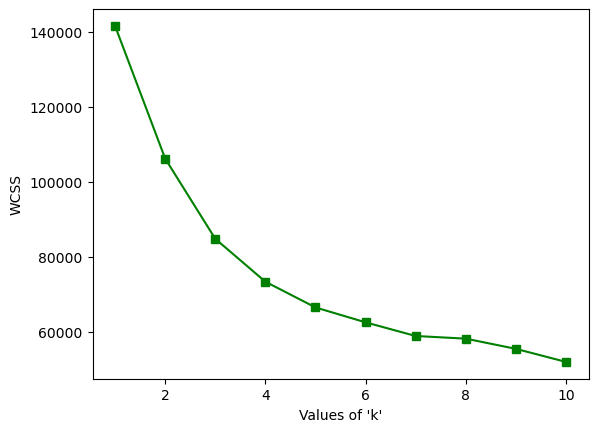

In [27]:
from sklearn.cluster import KMeans
wcss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df) 
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(n_clusters=5)

In [29]:
kmeans.cluster_centers_

array([[ 8.53606487e-04, -2.77706240e-01, -4.75861355e-01,
         1.07131340e-01,  1.54390462e+00,  2.78247057e-03,
         1.16695443e+00,  1.24563067e+00,  9.84458793e-01,
        -5.06645355e-01, -1.05726205e-01, -1.07601715e+00],
       [ 8.25763832e-01,  1.96167093e+00,  3.25754482e-01,
         1.06611579e+00, -6.13318771e-01,  9.72443549e-01,
        -8.35796305e-01, -1.27222953e+00,  1.05795842e+00,
        -1.67919622e-01,  1.30003006e+00, -2.96569437e-01],
       [ 6.62554261e-03, -5.45351732e-01, -3.63883016e-01,
         9.08081392e-02, -4.19133612e-01, -6.36474778e-01,
         2.20214469e-01,  1.00868140e-01, -1.09279155e+00,
         2.54214500e-01, -2.34634819e-01,  1.05092276e+00],
       [ 8.23810789e-03,  1.00275621e-01, -3.26367401e-01,
         1.77860415e-01, -1.70640889e-02, -2.62302469e-01,
        -2.66987785e-01,  1.70424043e-01, -8.45188412e-02,
        -4.27608044e-01, -3.37945908e-01, -2.25663795e-01],
       [ 8.83545771e-01,  6.75694393e-02,  2.0001911

In [22]:
kmeans.labels_
kmeans.inertia_

66536.3512589578

In [14]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(df),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,-0.751930,1.983232
1,0.263389,2.776509
2,-2.949380,1.980958
3,-1.427969,-0.521664
4,1.024113,-2.149620


In [15]:
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

/Users/nandipatioohasripriya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[ 0.40458335,  0.19870672],
       [-2.30369733,  1.33354531],
       [ 1.45164049,  2.1474929 ],
       [-3.48177786, -0.27364363],
       [ 0.88481744, -1.58109374]])

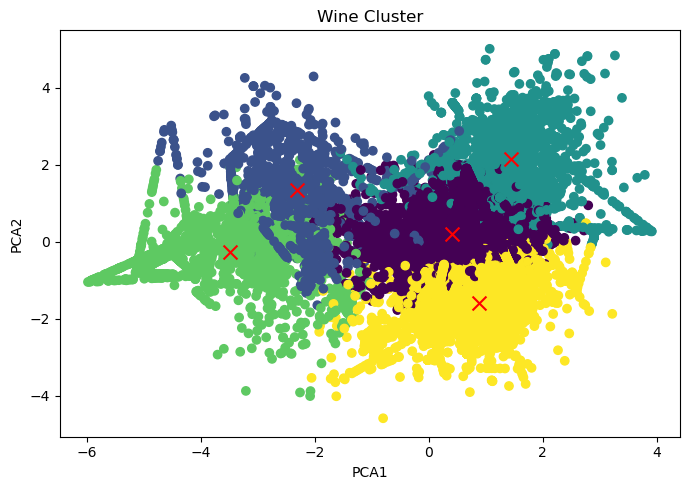

In [16]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

Centroids:
 [[ 7.79773157e-03 -5.66846319e-01 -3.61276176e-01  8.22845756e-02
  -4.48084791e-01 -6.34344584e-01  2.21089299e-01  1.01831921e-01
  -1.09837102e+00  3.17740543e-01 -1.99104252e-01  1.04410796e+00]
 [ 6.16491138e-03  1.00678135e-01 -3.33321643e-01  1.84922805e-01
   2.08499259e-03 -2.82653781e-01 -2.50803218e-01  1.66480088e-01
  -1.20247303e-01 -4.73962635e-01 -3.74322783e-01 -1.62755319e-01]
 [ 8.82080925e-01  6.91810671e-02  1.99748615e+00 -1.60578997e+00
  -5.68883913e-01  1.03499465e+00 -9.41082879e-01 -1.39769659e+00
   7.65431670e-01  1.14660844e+00  4.28009626e-01 -4.17329534e-01]
 [ 8.23336072e-01  1.95275001e+00  3.26124023e-01  1.06344023e+00
  -6.12003526e-01  9.71021213e-01 -8.34049206e-01 -1.26733140e+00
   1.05720714e+00 -1.64462428e-01  1.29816845e+00 -2.98358329e-01]
 [ 8.51788756e-04 -2.79962144e-01 -4.74856530e-01  1.05239377e-01
   1.53769465e+00  4.50900798e-03  1.16443644e+00  1.24590061e+00
   9.83813062e-01 -5.01795701e-01 -1.02715768e-01 -1.0789896

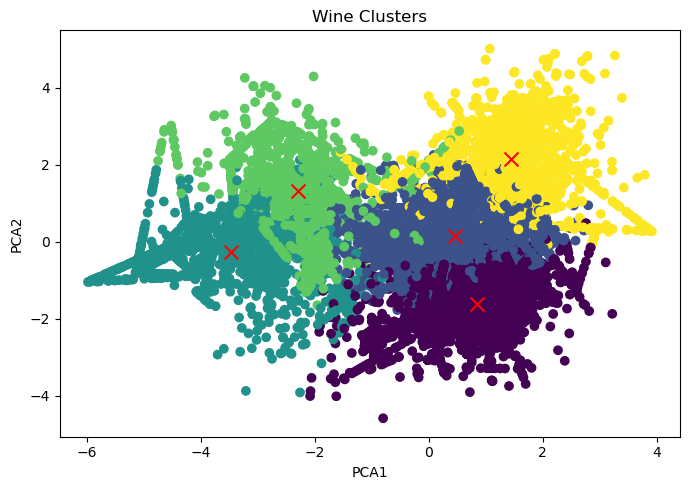

In [20]:
import numpy as np
import matplotlib.pyplot as plt

class KMeansScratch:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None
        
    #randomly making data points as centroids
    def initialize_centroids(self, X):
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    #calculating distance between centroid and the data point
    def compute_distances(self, X, centroids):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        return distances

    #calcuting new centroids after data points assigned to each cluster
    def update_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            points = X[labels == i]
            centroids[i] = points.mean(axis=0) if len(points) > 0 else np.zeros(X.shape[1])
        return centroids
    
    #SSE
    def calculate_sse(self, X):
        sse = 0.0
        for i in range(self.n_clusters):
            cluster_points = X[self.labels == i]
            sse += np.sum((cluster_points - self.centroids[i])**2)
        return sse
    

    #model fitting
    def fit(self, X):
        X = np.array(X)
        self.centroids = self.initialize_centroids(X)

        for iteration in range(self.max_iter):
            distances = self.compute_distances(X, self.centroids)
            new_labels = np.argmin(distances, axis=1)

            if self.labels is not None and np.all(self.labels == new_labels):
                break  # Stop if labels haven't changed significantly
            self.labels = new_labels

            new_centroids = self.update_centroids(X, self.labels)
            if np.all(np.linalg.norm(self.centroids - new_centroids, axis=1) < self.tol):
                break  # Stop if centroids converge
            self.centroids = new_centroids
            
        self.sse = self.calculate_sse(X)

    #prediction class
    def predict(self, X):
        distances = self.compute_distances(X, self.centroids)
        return np.argmin(distances, axis=1)


#dataframe to numpy
df_np = df.values  

kmeans_scratch = KMeansScratch(n_clusters=5)
kmeans_scratch.fit(df_np)

#centroids and labels
print("Centroids:\n", kmeans_scratch.centroids)
print("Labels:\n", kmeans_scratch.labels)
#SSE
print("Sum of Squared Errors (SSE):", kmeans_scratch.sse)


# Scatter plot with PCA-reduced features
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_X = pca.fit_transform(df_np)
centers = pca.transform(kmeans_scratch.centroids)

plt.figure(figsize=(7, 5))
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=kmeans_scratch.labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=100, c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Clusters')
plt.tight_layout()
plt.show()


# Decision Tree

In [37]:
df = pd.read_csv('dt_df.csv')

In [38]:
def categorize_quality(quality):
    if quality < 5:
        return 0
    elif quality > 7:
        return 2
    else:
        return 1

df['goodquality'] = df['quality'].apply(categorize_quality)


In [39]:
df['goodquality'].value_counts()

goodquality
1    5818
0    3884
2    3884
Name: count, dtype: int64

In [40]:
X = df.drop(['quality','goodquality'], axis = 1)
Y = df['goodquality']
X = np.array(X)
Y = np.array(Y)

In [41]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score,classification_report


# Train the model
model = DecisionTreeClassifier(criterion='entropy', random_state=7)
model.fit(X_train, Y_train)

# Set up k-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

y_pred = cross_val_predict(model, X, Y, cv=kfold)

#metrics
accuracy = accuracy_score(Y, y_pred)
print("Accuracy Score: ", accuracy)

report = classification_report(Y, y_pred, output_dict=True)
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Value': [accuracy, precision, recall, f1]
})

metrics_table

Accuracy Score:  0.9415574856469896


,Metric,Value
0,Accuracy,0.941557
1,Precision,0.941709
2,Recall,0.941557
3,F1 Score,0.941451


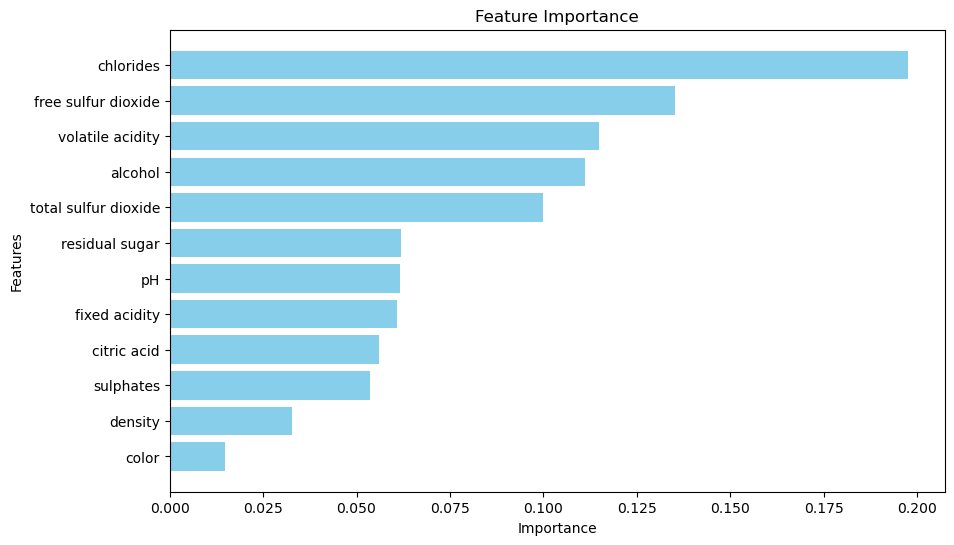

                 Feature  Importance
5              chlorides    0.197450
6    free sulfur dioxide    0.135222
2       volatile acidity    0.114820
11               alcohol    0.111074
7   total sulfur dioxide    0.099765
4         residual sugar    0.061853
9                     pH    0.061644
1          fixed acidity    0.060914
3            citric acid    0.055912
10             sulphates    0.053674
8                density    0.032860
0                  color    0.014812


In [56]:
# Extract feature importance from the model
feature_importance = model.feature_importances_

# Use the first 12 feature names from your DataFrame
feature_names = df.columns[:12]  # Assuming 'df' is your DataFrame

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance[:12]  # Only use the first 12 importance values
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Print the feature importance table
print(importance_df)


AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

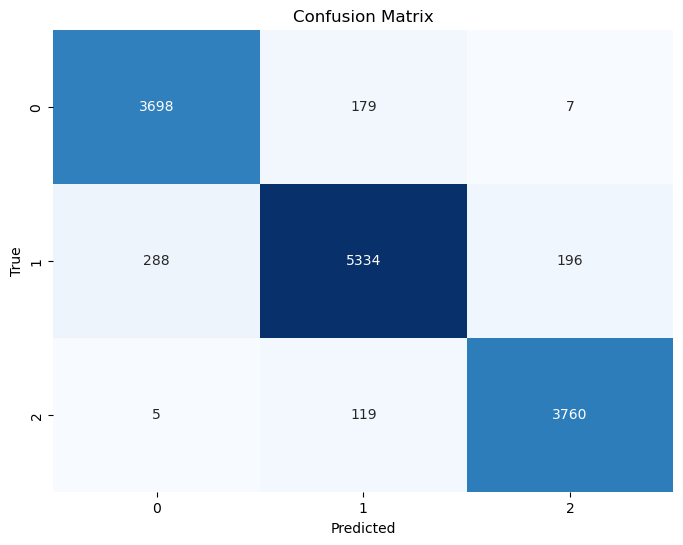

In [35]:
conf_matrix = confusion_matrix(Y, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])

# Labels and Title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

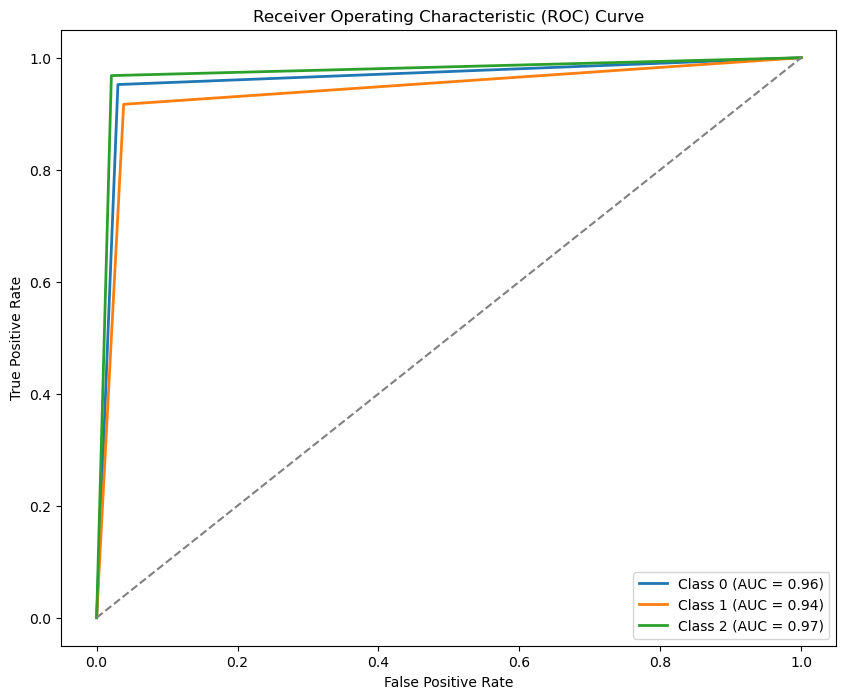

In [33]:
y_prob = cross_val_predict(model, X, Y, cv=kfold, method='predict_proba')
Y_bin = label_binarize(Y, classes=[0, 1, 2])

# Initialize the plot
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(3):  # Three classes (0, 1, 2)
    fpr, tpr, thresholds = roc_curve(Y_bin[:, i], y_prob[:, i])
    roc_auc = roc_auc_score(Y_bin[:, i], y_prob[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        """
        Constructor for the Node class.
        - feature: Index of the feature used for splitting
        - threshold: Threshold value for splitting
        - left: Left subtree
        - right: Right subtree
        - value: Leaf value for prediction
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value


class DecisionTreeClassifierFromScratch:
    def __init__(self, min_samples_split=2, max_depth=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None

    def entropy(self, y):
        "Calculate entropy for a label array."
        unique_classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities))

    def information_gain(self, parent_entropy, left_y, right_y):
        "Calculate Information Gain."
        n = len(left_y) + len(right_y)
        weight_left = len(left_y) / n
        weight_right = len(right_y) / n
        return parent_entropy - (weight_left * self.entropy(left_y) + weight_right * self.entropy(right_y))

    def split(self, X_column, threshold):
        "Split the data into left and right groups based on the threshold."
        left_indices = np.where(X_column <= threshold)
        right_indices = np.where(X_column > threshold)
        return left_indices[0], right_indices[0]

    def best_split(self, X, y):
        "Find the best split."
        best_gain = -1
        best_feature = None
        best_threshold = None
        parent_entropy = self.entropy(y)

        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_indices, right_indices = self.split(X[:, feature_idx], threshold)
                if len(left_indices) == 0 or len(right_indices) == 0:
                    continue

                left_y, right_y = y[left_indices], y[right_indices]
                gain = self.information_gain(parent_entropy, left_y, right_y)

                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def build_tree(self, X, y, depth=0):
        "Recursively build the decision tree."
        num_samples, num_features = X.shape
        num_labels = len(np.unique(y))

        if (num_samples < self.min_samples_split or
                (self.max_depth is not None and depth >= self.max_depth) or
                num_labels == 1):
            leaf_value = self.most_common_label(y)
            return Node(value=leaf_value)

        best_feature, best_threshold, best_gain = self.best_split(X, y)

        if best_gain == 0:
            leaf_value = self.most_common_label(y)
            return Node(value=leaf_value)

        left_indices, right_indices = self.split(X[:, best_feature], best_threshold)
        left_subtree = self.build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.build_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold,
                    left=left_subtree, right=right_subtree)

    def most_common_label(self, y):
        "Return the most common class label."
        return np.bincount(y).argmax()

    def fit(self, X, y):
        "Train the decision tree."
        self.root = self.build_tree(X, y)

    def predict_single(self, x, node):
        "Predict a single data point."
        if node.value is not None:
            return node.value

        if x[node.feature] <= node.threshold:
            return self.predict_single(x, node.left)
        return self.predict_single(x, node.right)

    def predict(self, X):
        "Predict multiple data points."
        return np.array([self.predict_single(x, self.root) for x in X])



from sklearn.metrics import accuracy_score


# Train custom model
custom_model = DecisionTreeClassifierFromScratch(max_depth=None)
custom_model.fit(X_train, Y_train)

#predictions
y_pred = custom_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Custom Decision Tree Accuracy:", accuracy)


Custom Decision Tree Accuracy: 0.9210009813542689
